In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [3]:
start = '2018-01-01'
end = datetime.date.today()
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000
...,...,...,...,...,...,...,...
1609,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600
1610,2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
1611,2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15023800
1612,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

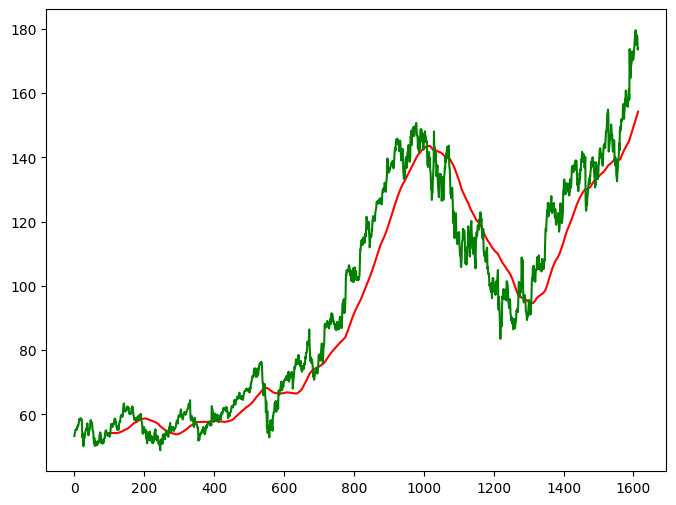

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

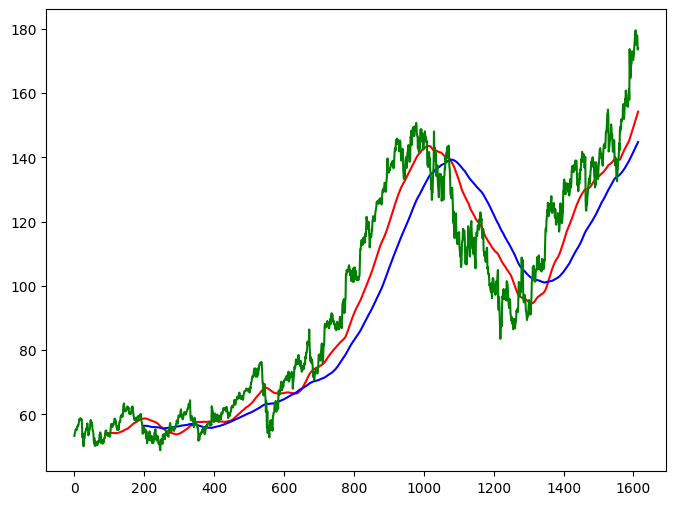

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data.shape[0]

1614

In [13]:
data_train.shape[0]

1291

In [14]:
data_test.shape[0]

323

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout

In [20]:
input_layer = Input(shape=(x.shape[1], 1))

In [21]:
model = Sequential([
    input_layer,
    LSTM(units=50, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(units=60, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(units=80, activation='relu', return_sequences=True),
    Dropout(0.4),
    LSTM(units=120, activation='relu'),
    Dropout(0.5),
    Dense(units=1)
])

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - loss: 0.1362
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - loss: 0.0277
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - loss: 0.0128
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 288ms/step - loss: 0.0119
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0095
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - loss: 0.0102
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 298ms/step - loss: 0.0093
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 293ms/step - loss: 0.0096
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 290ms/step - loss: 0.0101
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - loss: 0.0079
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 282ms/step - loss: 0.0070
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 283ms/step - loss: 0.0073
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - loss: 0.0066
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - loss: 0.0069
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 2

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [27]:
data_test_scale  =  scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [32]:
y = y*scale

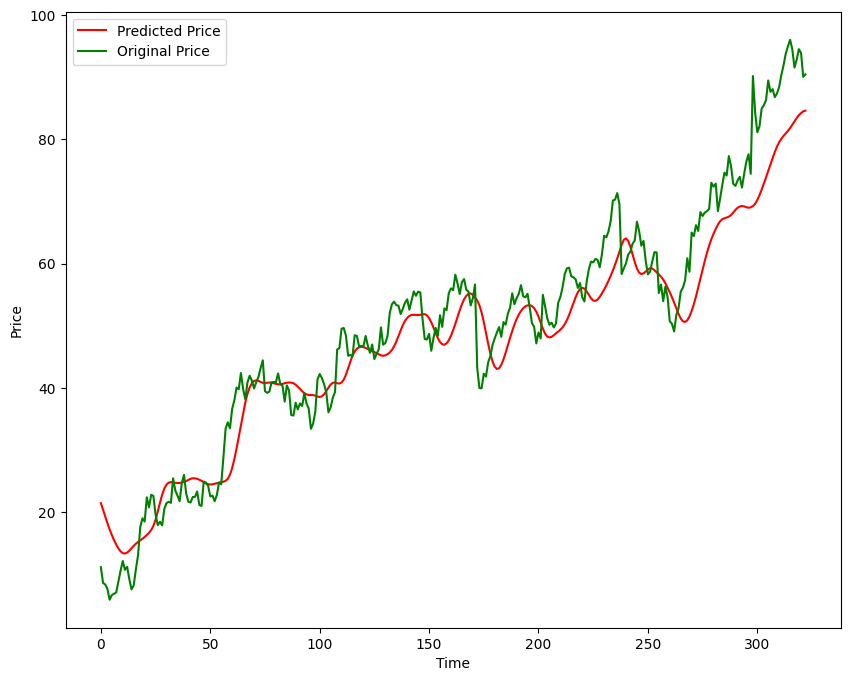

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')